In [88]:
from yahoofinancials import YahooFinancials
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML

In [89]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Import data

In [90]:
STOCK_PICK = 'SPY'
#INCOME STATEMENT
appl_financial_statement_dict = YahooFinancials(STOCK_PICK).get_financial_stmts('annual', 'income')
#BALANCE STATEMENT
appl_balance_statement_dict = YahooFinancials(STOCK_PICK).get_financial_stmts('annual', 'balance')

### Financial Statement

In [91]:
df_appl_financial_statement = pd.DataFrame.from_dict(appl_financial_statement_dict['incomeStatementHistory'][STOCK_PICK][0]).T
appl_financial_statement_dict['incomeStatementHistory'][STOCK_PICK][3]

{'2014-12-31': {'researchDevelopment': 9275000000,
  'effectOfAccountingCharges': None,
  'incomeBeforeTax': -74000000,
  'minorityInterest': None,
  'netIncome': -241000000,
  'sellingGeneralAdministrative': 16650000000,
  'grossProfit': 26236000000,
  'ebit': 178000000,
  'operatingIncome': 178000000,
  'otherOperatingExpenses': 133000000,
  'interestExpense': -210000000,
  'extraordinaryItems': None,
  'nonRecurring': None,
  'otherItems': None,
  'incomeTaxExpense': 167000000,
  'totalRevenue': 88988000000,
  'totalOperatingExpenses': 88810000000,
  'costOfRevenue': 62752000000,
  'totalOtherIncomeExpenseNet': -252000000,
  'discontinuedOperations': None,
  'netIncomeFromContinuingOps': -241000000,
  'netIncomeApplicableToCommonShares': -241000000}}

In [92]:
#CONVERT DICTIONARY TO DATAFRAME
for year in range(len(appl_financial_statement_dict['incomeStatementHistory'][STOCK_PICK])):
    df_new = pd.DataFrame.from_dict(appl_financial_statement_dict['incomeStatementHistory'][STOCK_PICK][year]).T
    df_appl_financial_statement = df_appl_financial_statement.append(df_new)

In [93]:
#CLEAN UP DATAFRAME
df_appl_financial_statement.fillna(0, inplace=True)
df_appl_financial_statement = df_appl_financial_statement.drop_duplicates(keep='first')
df_appl_financial_statement.head()

,costOfRevenue,discontinuedOperations,ebit,effectOfAccountingCharges,extraordinaryItems,grossProfit,incomeBeforeTax,incomeTaxExpense,interestExpense,minorityInterest,...,netIncomeFromContinuingOps,nonRecurring,operatingIncome,otherItems,otherOperatingExpenses,researchDevelopment,sellingGeneralAdministrative,totalOperatingExpenses,totalOtherIncomeExpenseNet,totalRevenue
2017-12-31,1.119340e+11,0.0,4.106000e+09,0.0,0.0,6.593200e+10,3.802000e+09,7.690000e+08,-848000000.0,0.0,...,3.033000e+09,0.0,4.106000e+09,0.0,214000000.0,2.262000e+10,3.899200e+10,1.737600e+11,-304000000.0,1.778660e+11
2016-12-31,8.826500e+10,0.0,4.186000e+09,0.0,0.0,4.772200e+10,3.796000e+09,1.425000e+09,-484000000.0,0.0,...,2.371000e+09,0.0,4.186000e+09,0.0,167000000.0,1.608500e+10,2.728400e+10,1.318010e+11,-390000000.0,1.359870e+11
2015-12-31,7.165100e+10,0.0,2.233000e+09,0.0,0.0,3.535500e+10,1.546000e+09,9.500000e+08,-459000000.0,0.0,...,5.960000e+08,0.0,2.233000e+09,0.0,171000000.0,1.254000e+10,2.041100e+10,1.047730e+11,-687000000.0,1.070060e+11
2014-12-31,6.275200e+10,0.0,1.780000e+08,0.0,0.0,2.623600e+10,-7.400000e+07,1.670000e+08,-210000000.0,0.0,...,-2.410000e+08,0.0,1.780000e+08,0.0,133000000.0,9.275000e+09,1.665000e+10,8.881000e+10,-252000000.0,8.898800e+10


### Balance Sheet

In [94]:
df_appl_balance_statement = pd.DataFrame.from_dict(appl_balance_statement_dict['balanceSheetHistory'][STOCK_PICK][0]).T
appl_balance_statement_dict['balanceSheetHistory'][STOCK_PICK][1]


{'2016-12-31': {'intangibleAssets': 854000000,
  'capitalSurplus': 17186000000,
  'totalLiab': 64117000000,
  'totalStockholderEquity': 19285000000,
  'otherCurrentLiab': 7168000000,
  'totalAssets': 83402000000,
  'commonStock': 5000000,
  'retainedEarnings': 4916000000,
  'otherLiab': 5088000000,
  'goodWill': 3784000000,
  'treasuryStock': -2822000000,
  'otherAssets': 3646000000,
  'cash': 19334000000,
  'totalCurrentLiabilities': 43816000000,
  'shortLongTermDebt': 1056000000,
  'otherStockholderEquity': -985000000,
  'propertyPlantEquipment': 29114000000,
  'totalCurrentAssets': 45781000000,
  'longTermInvestments': 223000000,
  'netTangibleAssets': 14647000000,
  'shortTermInvestments': 6647000000,
  'netReceivables': 8339000000,
  'longTermDebt': 7694000000,
  'inventory': 11461000000,
  'accountsPayable': 25309000000}}

In [95]:
#CONVERT DICTIONARY TO DATAFRAME
for year in range(len(appl_balance_statement_dict['balanceSheetHistory'][STOCK_PICK])):
    df_new2 = pd.DataFrame.from_dict(appl_balance_statement_dict['balanceSheetHistory'][STOCK_PICK][year]).T
    df_appl_balance_statement = df_appl_balance_statement.append(df_new2)

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [96]:
#CLEAN UP DATAFRAME
df_appl_balance_statement.fillna(0, inplace=True)
df_appl_balance_statement=df_appl_balance_statement.drop_duplicates(keep='first')
df_appl_balance_statement.head()

,accountsPayable,capitalSurplus,cash,commonStock,goodWill,intangibleAssets,inventory,longTermDebt,longTermInvestments,netReceivables,...,propertyPlantEquipment,retainedEarnings,shortLongTermDebt,shortTermInvestments,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalLiab,totalStockholderEquity,treasuryStock
2017-12-31,34616000000,21389000000,20522000000,5000000,13350000000,3371000000,16047000000,24743000000,441000000.0,13164000000,...,48866000000,8636000000,100000000,10464000000,131310000000,60197000000,57883000000,103601000000,27709000000,-2321000000
2016-12-31,25309000000,17186000000,19334000000,5000000,3784000000,854000000,11461000000,7694000000,223000000.0,8339000000,...,29114000000,4916000000,1056000000,6647000000,83402000000,45781000000,43816000000,64117000000,19285000000,-2822000000
2015-12-31,20397000000,13394000000,15890000000,5000000,3759000000,992000000,10243000000,8227000000,16000000.0,5654000000,...,21838000000,2545000000,238000000,3918000000,64747000000,35705000000,33887000000,51363000000,13384000000,-2560000000
2014-12-31,16459000000,11135000000,14557000000,5000000,3319000000,764000000,8299000000,8265000000,0.0,5612000000,...,16967000000,1949000000,1520000000,2859000000,54505000000,31327000000,28089000000,43764000000,10741000000,-2348000000


In [97]:
df_health_metrics = pd.DataFrame({'currentRatio' : []})

# Company health metrics

### CURRENT RATIO

$
\begin{align*}
currentRatio = \frac{currentAsset}{currentLiabilities} \\
\end{align*}
$


In [98]:
#CALCULATE CURRENT RATIO
df_health_metrics['currentRatio'] = df_appl_balance_statement['totalCurrentAssets']/df_appl_balance_statement['totalCurrentLiabilities']

In [99]:
df_current_ratio = pd.DataFrame({'currentRatio' : df_health_metrics['currentRatio']})
df_current_ratio['totalCurrentAssets'] = df_appl_balance_statement['totalCurrentAssets']
df_current_ratio['totalCurrentLiabilities'] = df_appl_balance_statement['totalCurrentLiabilities']
df_current_ratio[['currentRatio', 'totalCurrentAssets','totalCurrentLiabilities']]

,currentRatio,totalCurrentAssets,totalCurrentLiabilities
2017-12-31,1.039977,60197000000,57883000000
2016-12-31,1.044847,45781000000,43816000000
2015-12-31,1.053649,35705000000,33887000000
2014-12-31,1.115276,31327000000,28089000000


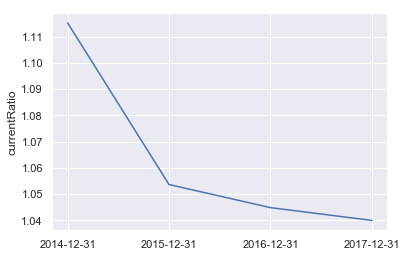

In [100]:
plt.ylabel('currentRatio')
y=df_health_metrics['currentRatio'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### DSO - Days Sales Outstanding
Days between delivery and payment
$
\begin{align*}
DSO = \frac{netReceivables}{revenue} *360\\
\end{align*}
$

In [101]:
#CALCULATE DSO
df_health_metrics['dso']=df_appl_balance_statement['netReceivables']/(df_appl_financial_statement['totalRevenue'])*360

In [102]:
df_dso = pd.DataFrame({'dso' : df_health_metrics['dso']})
df_dso['netReceivables'] = df_appl_balance_statement['netReceivables']
df_dso['totalRevenue'] = df_appl_financial_statement['totalRevenue']
df_dso

,dso,netReceivables,totalRevenue
2017-12-31,26.643878,13164000000,1.778660e+11
2016-12-31,22.075934,8339000000,1.359870e+11
2015-12-31,19.021737,5654000000,1.070060e+11
2014-12-31,22.703286,5612000000,8.898800e+10


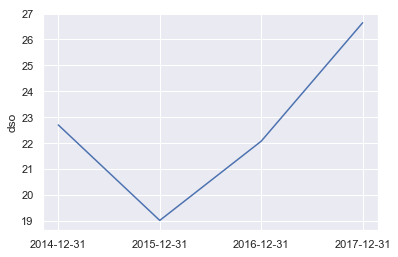

In [103]:
plt.ylabel('dso')
y=df_health_metrics['dso'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### DIO - Days Sales of Inventory

$
\begin{align*}
DIO = \frac{inventory}{costOfRevenue} *360\\
\end{align*}
$

In [104]:
#Calculate DIO
# df_appl_balance_statement['inventory']
# df_appl_financial_statement['costOfRevenue']
# df_appl_balance_statement['inventory'] = 0
# df_appl_financial_statement['costOfRevenue'] = 0
df_health_metrics['dio']=(df_appl_balance_statement['inventory']/df_appl_financial_statement['costOfRevenue'])*360

In [105]:
df_dio = pd.DataFrame({'dio' : df_health_metrics['dio']})
df_dio['inventory'] = df_appl_balance_statement['inventory']
df_dio['costOfRevenue'] = df_appl_financial_statement['costOfRevenue']
df_dio

,dio,inventory,costOfRevenue
2017-12-31,51.610056,16047000000,1.119340e+11
2016-12-31,46.745142,11461000000,8.826500e+10
2015-12-31,51.464460,10243000000,7.165100e+10
2014-12-31,47.610275,8299000000,6.275200e+10


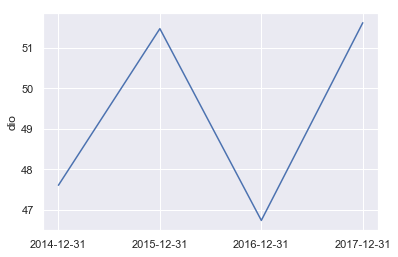

In [106]:
plt.ylabel('dio')
y=df_health_metrics['dio'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### DPO - Days Payable Outstanding

$
\begin{align*}
DPO = \frac{accountPayable}{costOfRevenue} *360\\
\end{align*}
$

In [107]:
#DPO = Account Payable/Cost of Good Sold * 360
df_health_metrics['dpo']=(df_appl_balance_statement['accountsPayable']/df_appl_financial_statement['costOfRevenue'])*360

In [108]:
df_dpo = pd.DataFrame({'dpo' : df_health_metrics['dpo']})
df_dpo['accountsPayable'] = df_appl_balance_statement['accountsPayable']
df_dpo['costOfRevenue'] = df_appl_financial_statement['costOfRevenue']
df_dpo

,dpo,accountsPayable,costOfRevenue
2017-12-31,111.331320,34616000000,1.119340e+11
2016-12-31,103.225967,25309000000,8.826500e+10
2015-12-31,102.481752,20397000000,7.165100e+10
2014-12-31,94.423126,16459000000,6.275200e+10


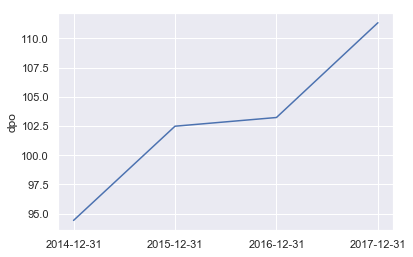

In [109]:
plt.ylabel('dpo')
y=df_health_metrics['dpo'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### Net Trade Cycle 

$
\begin{align*}
netTradeCycle = DSO + DIO -DPO \\
\end{align*}
$

In [110]:
#Net Trade Cycle = DSO + DIO - DPO (-)
df_health_metrics['netTradeCycle'] = df_health_metrics['dso'] + df_health_metrics['dio'] - df_health_metrics['dpo']

In [111]:
df_nettrade = pd.DataFrame({'netTradeCycle' : df_health_metrics['netTradeCycle']})
df_nettrade['dso'] = df_health_metrics['dso']
df_nettrade['dio'] = df_health_metrics['dio']
df_nettrade['dpo'] = df_health_metrics['dpo']
df_nettrade

,netTradeCycle,dso,dio,dpo
2017-12-31,-33.077386,26.643878,51.610056,111.331320
2016-12-31,-34.404891,22.075934,46.745142,103.225967
2015-12-31,-31.995555,19.021737,51.464460,102.481752
2014-12-31,-24.109565,22.703286,47.610275,94.423126


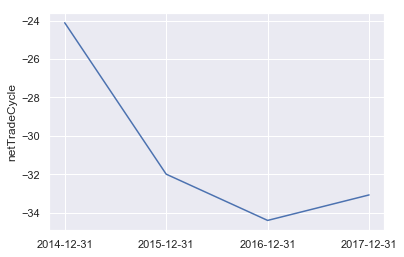

In [112]:
plt.ylabel('netTradeCycle')
y=df_health_metrics['netTradeCycle'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### Debt Ratio

$
\begin{align*}
debtRatio = \frac{totalLiability}{totalAsset} \\
\end{align*}
$

In [113]:
#Debt Ratio = Total Liability/ Total Asset
df_health_metrics['debtRatio'] = df_appl_balance_statement['totalLiab']/df_appl_balance_statement['totalAssets']

In [114]:
df_debtratio = pd.DataFrame({'debtRatio' : df_health_metrics['debtRatio']})
df_debtratio['totalLiab'] = df_appl_balance_statement['totalLiab']
df_debtratio['totalAssets'] = df_appl_balance_statement['totalAssets']
df_debtratio

,debtRatio,totalLiab,totalAssets
2017-12-31,0.788980,103601000000,131310000000
2016-12-31,0.768771,64117000000,83402000000
2015-12-31,0.793288,51363000000,64747000000
2014-12-31,0.802936,43764000000,54505000000


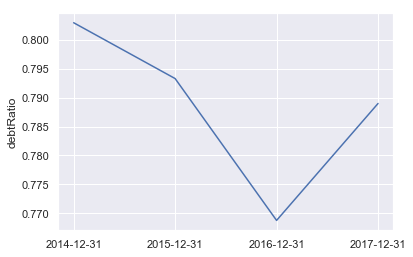

In [115]:
plt.ylabel('debtRatio')
y=df_health_metrics['debtRatio'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### Interest Coverage

$
\begin{align*}
interestCoverage = \frac{EBIT}{interestExpense} \\
\end{align*}
$

In [116]:
#Interest Coverage = EBIT/Interest Expense
df_health_metrics['interestCoverage']=df_appl_financial_statement['ebit']/(-1*df_appl_financial_statement['interestExpense'])

In [117]:
df_interestcov = pd.DataFrame({'interestCoverage' : df_health_metrics['interestCoverage']})
df_interestcov['ebit'] = df_appl_financial_statement['ebit']
df_interestcov['interestExpense'] = df_appl_financial_statement['interestExpense']
df_interestcov

,interestCoverage,ebit,interestExpense
2017-12-31,4.841981,4.106000e+09,-848000000.0
2016-12-31,8.648760,4.186000e+09,-484000000.0
2015-12-31,4.864924,2.233000e+09,-459000000.0
2014-12-31,0.847619,1.780000e+08,-210000000.0


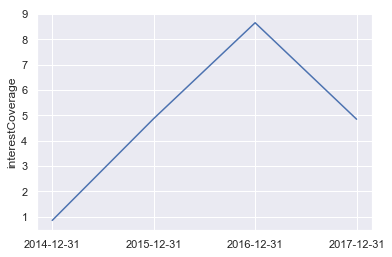

In [118]:
plt.ylabel('interestCoverage')
y=df_health_metrics['interestCoverage'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### ROA- Return on Asset

$
\begin{align*}
ROA = \frac{EBIT}{totalAsset} \\
\end{align*}
$

In [119]:
#ROA = EBIT/Total Asset
df_health_metrics['roa'] = df_appl_financial_statement['ebit']/df_appl_balance_statement['totalAssets']*100

In [120]:
df_roa = pd.DataFrame({'roa' : df_health_metrics['roa']})
df_roa['ebit'] = df_appl_financial_statement['ebit']
df_roa['totalAssets'] = df_appl_balance_statement['totalAssets']
df_roa

,roa,ebit,totalAssets
2017-12-31,3.126951,4.106000e+09,131310000000
2016-12-31,5.019064,4.186000e+09,83402000000
2015-12-31,3.448808,2.233000e+09,64747000000
2014-12-31,0.326576,1.780000e+08,54505000000


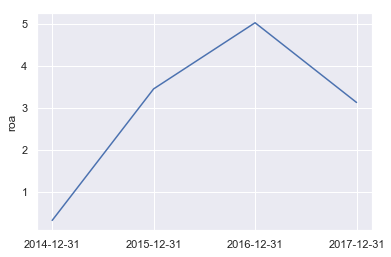

In [121]:
plt.ylabel('roa')
y=df_health_metrics['roa'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### ROE- Return on Equity

$
\begin{align*}
ROE = \frac{netIncome}{totalEquity} \\
\end{align*}
$

In [122]:
#ROI = Net Income/Total Equity
df_health_metrics['roe'] =df_appl_financial_statement['netIncome']/df_appl_balance_statement['totalStockholderEquity']*100

In [123]:
df_roi = pd.DataFrame({'roe' : df_health_metrics['roe']})
df_roi['netIncome'] = df_appl_financial_statement['netIncome']
df_roi['totalStockholderEquity'] = df_appl_balance_statement['totalStockholderEquity']
df_roi

,roe,netIncome,totalStockholderEquity
2017-12-31,10.945902,3.033000e+09,27709000000
2016-12-31,12.294529,2.371000e+09,19285000000
2015-12-31,4.453078,5.960000e+08,13384000000
2014-12-31,-2.243739,-2.410000e+08,10741000000


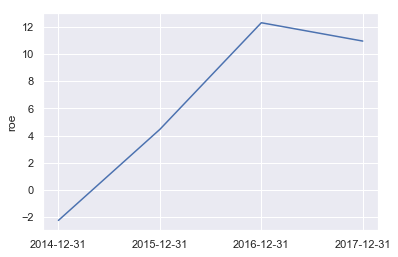

In [124]:
plt.ylabel('roe')
y=df_health_metrics['roe'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

### Revenue Growth

$
\begin{align*}
revenueGrowth = \frac{revenue_(current)}{revenue_(previous) - 1 } \\
\end{align*}
$

In [125]:
#Revenue Growth = Revenue/(Revenue last year -1)
df_health_metrics['revenueGrowth'] = df_appl_financial_statement['totalRevenue'].sort_index().pct_change()

In [126]:
df_revgrowth = pd.DataFrame({'revenueGrowth' : df_health_metrics['revenueGrowth']})
df_revgrowth['totalRevenue'] = df_appl_financial_statement['totalRevenue']
df_revgrowth

,revenueGrowth,totalRevenue
2017-12-31,0.307963,1.778660e+11
2016-12-31,0.270835,1.359870e+11
2015-12-31,0.202477,1.070060e+11
2014-12-31,NaN,8.898800e+10


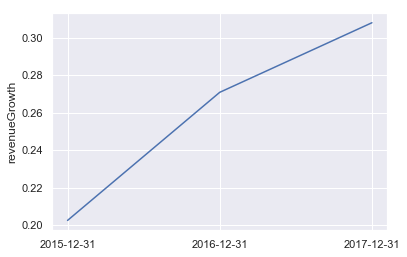

In [127]:
plt.ylabel('revenueGrowth')
y=df_health_metrics['revenueGrowth'][::-1]
x=df_health_metrics.index[::-1]
plt.plot(x,y)
plt.show()

$
\begin{align*}
currentRatio = \frac{currentAsset}{currentLiabilities} \\
\\
DSO = \frac{netReceivables}{revenue} *360\\
\\
DIO = \frac{inventory}{costOfRevenue} *360\\
\\
DPO = \frac{accountPayable}{costOfRevenue} *360\\
\\
netTradeCycle = DSO + DIO +DPO \\
\\
debtRatio = \frac{totalLiability}{totalAsset} \\
\\
interestCoverage = \frac{EBIT}{interestExpense} \\
\\
ROA = \frac{EBIT}{totalAsset} \\
\\
ROE = \frac{netIncome}{totalEquity} \\
\\
revenueGrowth = \frac{revenue_(current)}{revenue_(previous) - 1 } \\
\end{align*}
$
